<a href="https://colab.research.google.com/github/mohammadZali/Heart-Attacks/blob/main/HeartAttac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Information:

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved


target :
0 = less chance of heart attack
1 = more chance of heart attack


Questions to be answered:

Does the age of a person contribute towards heart attack?
Are different types of chest pain related to each other or the possibility of getting a heart attack?
Does high blood pressure increase the risk of heart attack?
Does the choestrol level eventually contribute as a risk factor towards heart attack?


In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns #data visualization

import warnings as wr
wr.filterwarnings("ignore") #to ignore the warnings

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Kaggle/heart.csv')

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

we did all preprocessing and now we dont have any null value

In [ ]:
df.duplicated().sum()

1

we have one duplicate in our row lets remove it

In [ ]:
df.drop_duplicates(inplace=True)
print("The number of raws=",df.shape[0],"The number of features=",df.shape[1])

The number of raws= 302 The number of features= 14


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#This is to look at what all unique values have . Just trying to use python
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col:
  print('{} :{}'.format(col.upper(),df[col].unique()))

SEX :[1 0]
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
CP :[3 2 1 0]
THALL :[1 2 3 0]
EXNG :[0 1]


The numer of people who have sex as 0 are 96 & The numer of people who have sex as 1 are 206


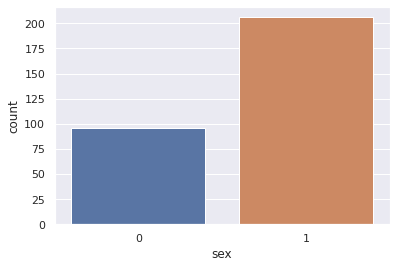

In [ ]:
print("The numer of people who have sex as 0 are",df.sex.value_counts()[0],"& The numer of people who have sex as 1 are",df.sex.value_counts()[1])
sns.set_theme(style="darkgrid")
po = sns.countplot(x="sex", data=df)
plt.show()

cp : Chest Pain type chest pain type

Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic

The numer of people who have cp as 0 are 143 
 The numer of people who have cp as 1 are 50 
 The numer of people who have cp as 2 are 86 
 The numer of people who have cp as 3 are 23


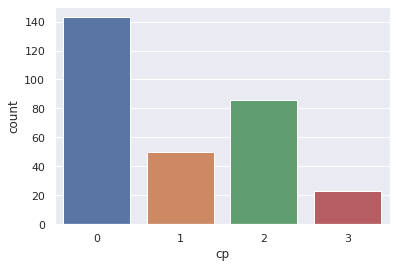

In [ ]:
print("The numer of people who have cp as 0 are",df.cp.value_counts()[0],"\n The numer of people who have cp as 1 are",df.cp.value_counts()[1],
      "\n The numer of people who have cp as 2 are",df.cp.value_counts()[2]
      ,"\n The numer of people who have cp as 3 are",df.cp.value_counts()[3])

sns.set_theme(style="darkgrid")
po = sns.countplot(x="cp", data=df)
plt.show()

The numer of people who have fbs as 0 are 257 
 The numer of people who have cp as 1 are 45


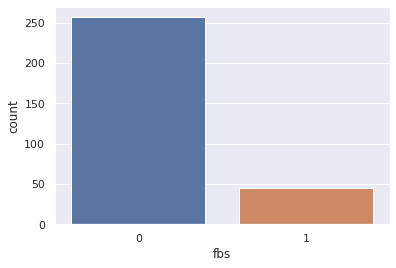

In [ ]:
print("The numer of people who have fbs as 0 are",df.fbs.value_counts()[0],"\n The numer of people who have cp as 1 are",df.fbs.value_counts()[1])

sns.set_theme(style="darkgrid")
po = sns.countplot(x="fbs", data=df)
plt.show()

The numer of people who have thall as 0 are 2 
 The numer of people who have thall as 1 are 18 
 The numer of people who have thall as 2 are 165 
 The numer of people who have thall as 3 are 117


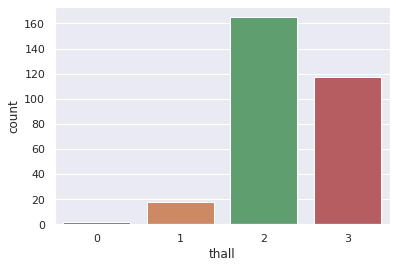

In [ ]:
print("The numer of people who have thall as 0 are",df.thall.value_counts()[0],"\n The numer of people who have thall as 1 are",df.thall.value_counts()[1],
      "\n The numer of people who have thall as 2 are",df.thall.value_counts()[2]
      ,"\n The numer of people who have thall as 3 are",df.thall.value_counts()[3])

sns.set_theme(style="darkgrid")
po = sns.countplot(x="thall", data=df)
plt.show()

The numer of people who have restecg as 0 are 147 
 The numer of people who have restecg as 1 are 151 
 The numer of people who have restecg as 2 are 4


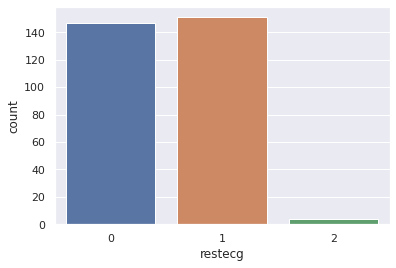

In [ ]:
print("The numer of people who have restecg as 0 are",df.restecg.value_counts()[0],"\n The numer of people who have restecg as 1 are",df.restecg.value_counts()[1],
      "\n The numer of people who have restecg as 2 are",df.restecg.value_counts()[2]
      )

sns.set_theme(style="darkgrid")
po = sns.countplot(x="restecg", data=df)
plt.show()

In [ ]:
#Spliting data into X & Y 
X=df.drop(['output'],axis=1)
Y=df['output']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ScalerX=MinMaxScaler(feature_range=(0,1))
X[X.columns]=ScalerX.fit_transform(X[X.columns])

In [ ]:
#Split Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.25%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=2)

knn_model.fit(X_train, y_train)

y_pred1 = knn_model.predict(X_test)
predictions1 = [round(value) for value in y_pred1]

accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 90.16%


In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred2 = clf.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 90.16%


In [ ]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

modelC = MLPClassifier()
modelC.fit(X_train, y_train)

y_pred3=modelC.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy3 * 100.0))


Accuracy: 90.16%
